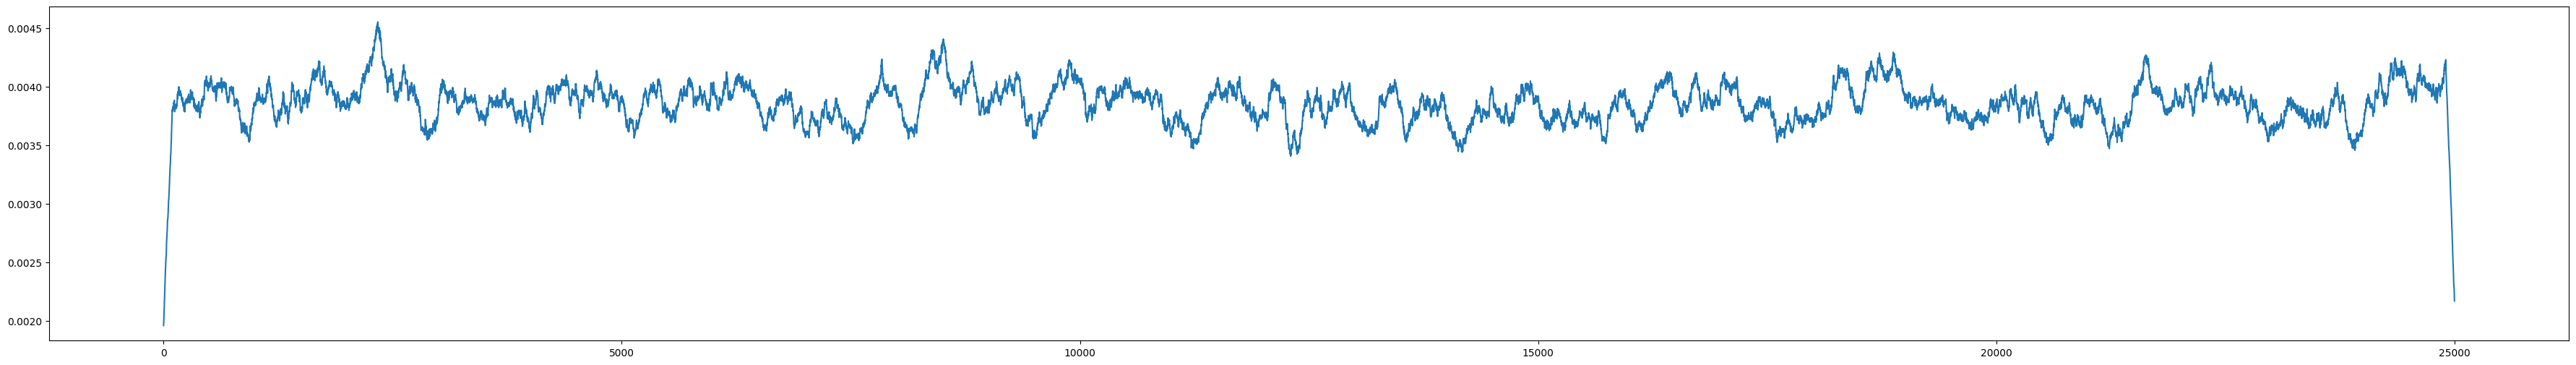

In [9]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

samples = np.fromfile('../data/ct9_160601530mhz.s8', np.uint8)
arr = samples[200_000_000:205_000_000]

iq = arr.astype(np.float32).view(np.complex64)
iq /= 127.5
iq -= 1 + 1j
arr = iq.copy()

t = np.arange(len(arr))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*101530)

arr = arr * p
arr = signal.convolve(arr, h, 'same')
arr = arr[::100]
arr = np.abs(arr)
arr = signal.convolve(arr, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(arr)
plt.show()

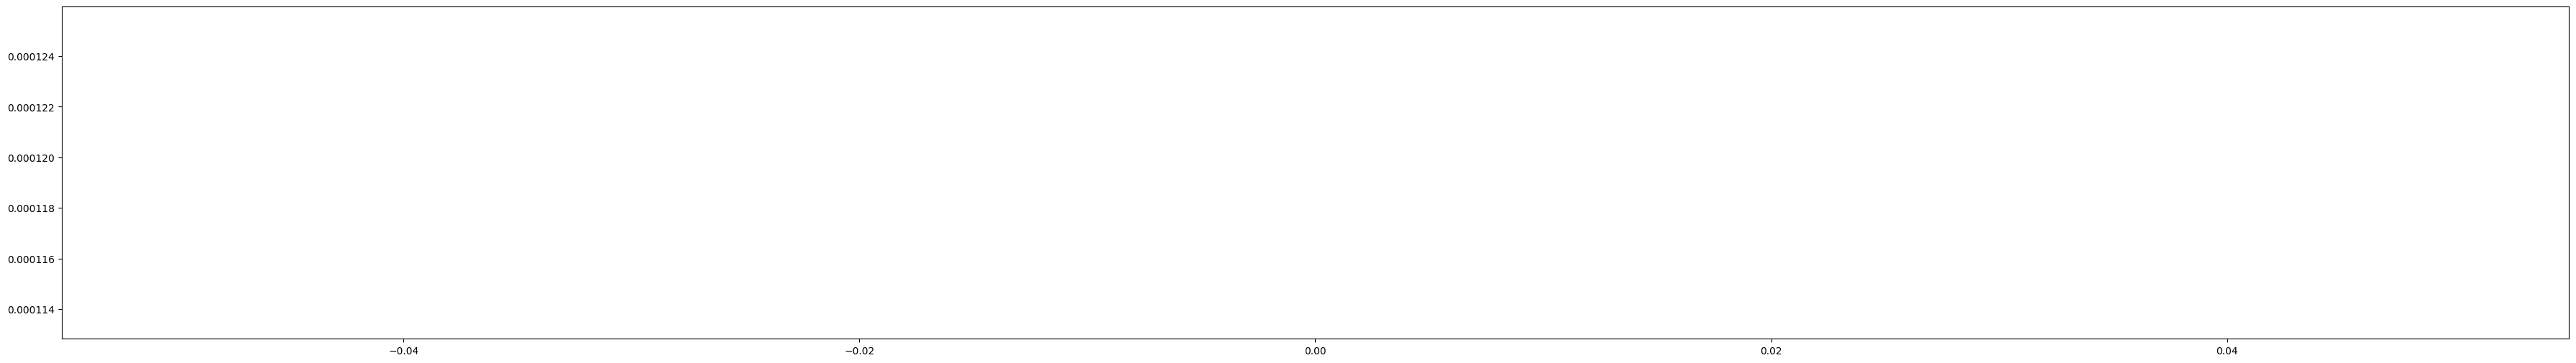

In [14]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

#samples = np.fromfile('../data/ct8_160601530mhz.s8', np.uint8)
#x = samples[200_000_000:205_000_000]
x = np.array([100, 200, 245, 10])
x = x.astype(np.float32)
x = (x - 127) / 128

x_real = x[::2]
x_imag = x[1::2]

x = x.astype(np.float32).view(np.complex64)

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*101530)

x = x * p
x = signal.convolve(x, h, 'same')
x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(x)
plt.show()